In [32]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
houses = pd.read_table("AmesHousing_1.txt")

In [5]:
houses["Land Slope"].describe()

count     2930
unique       3
top        Gtl
freq      2789
Name: Land Slope, dtype: object

In [10]:
houses["Land Slope"].unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

```
Land Slope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
       
 ```

In [6]:
houses["Land Slope"].head(10)

0    Gtl
1    Gtl
2    Gtl
3    Gtl
4    Gtl
5    Gtl
6    Gtl
7    Gtl
8    Gtl
9    Gtl
Name: Land Slope, dtype: object

In [9]:
houses["Roof Style"].describe()

count      2930
unique        6
top       Gable
freq       2321
Name: Roof Style, dtype: object

In [11]:
houses["Roof Style"].unique()

array(['Hip', 'Gable', 'Mansard', 'Gambrel', 'Shed', 'Flat'], dtype=object)

In [12]:
houses["Kitchen AbvGr"].unique()

array([1, 2, 3, 0])

In [ ]:
scale_land = 'ordinal'
scale_roof = 'nominal'
kitchen_variable = 'discrete'

### 2. The Mode for Ordinal Variables

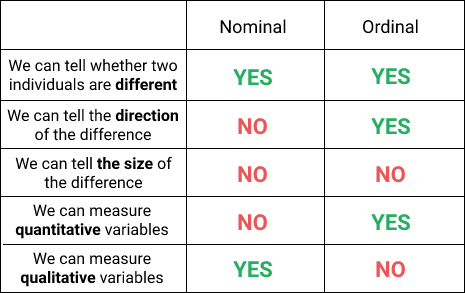

In [13]:
#func to calculate mode
def mode(array):
    counts = {}
    
    for value in array:
        if value in counts:
            counts[value] += 1
        else:
            counts[value] = 1
    
    return max(counts, key = counts.get)


In [15]:
mode_function = mode(houses['Land Slope'])
mode_method = houses['Land Slope'].mode()
same = (mode_function == mode_method)
same

0    True
dtype: bool

### 3. The Mode for Nominal Variables
Because the `Roof Style` variable is nominal, there's also no inherent order of the values in the distribution. This means that we can't sort the values in an ascending or descending order. The first step in computing the median is to sort the values in ascending order, which means we can't compute the median for the `Roof Style` variable.

In [16]:
print(houses['Roof Style'].value_counts())

Gable      2321
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: Roof Style, dtype: int64


In [20]:
#the function returns both the mode and the dictionary containing the count for each unique value in the array.
def mode(array):
    counts = {}
    
    for value in array:
        if value in counts:
            counts[value] += 1
        else:
            counts[value] = 1
    
    return (max(counts, key = counts.get), counts)



In [21]:
mode, value_counts = mode(houses["Roof Style"])
mode
value_counts

'Gable'

{'Hip': 551,
 'Gable': 2321,
 'Mansard': 11,
 'Gambrel': 22,
 'Shed': 5,
 'Flat': 20}

### The above calculation are done under the hood when we run `Series.value_counts()`

### 4. The Mode for Discrete Variables
A variable is discrete if there's no possible intermediate value between any two adjacent values. The `Kitchen AbvGr` variable, which describes the number of kitchens in a house:

In [22]:
houses['Kitchen AbvGr'].value_counts().sort_index()

0       3
1    2796
2     129
3       2
Name: Kitchen AbvGr, dtype: int64

The `Bedroom AbvGr` variable is `discrete` and `SalePrice` id `continuous` variable.

In [24]:
bedroom_mode = houses['Bedroom AbvGr'].mode()
bedroom_mode

0    3
dtype: int64

### 5. Special Cases

In [25]:
intervals = pd.interval_range(start = 0, end = 800000, freq = 100000)
gr_freq_table = pd.Series([0,0,0,0,0,0,0,0], index = intervals)

for value in houses['SalePrice']:
    for interval in intervals:
        if value in interval:
            gr_freq_table.loc[interval] += 1
            break

print(gr_freq_table)

(0, 100000]          252
(100000, 200000]    1821
(200000, 300000]     627
(300000, 400000]     166
(400000, 500000]      47
(500000, 600000]      11
(600000, 700000]       4
(700000, 800000]       2
dtype: int64


In [26]:
#Find the class interval with the highest frequency, then find its midpoint.
midpoint = 150000
mean = houses['SalePrice'].mean()
median = houses['SalePrice'].median()

In [27]:
mean

180796.0600682594

In [28]:
median

160000.0

The mode is lower than the median, and the median is lower than the mean.

### 6. Skewed Distributions

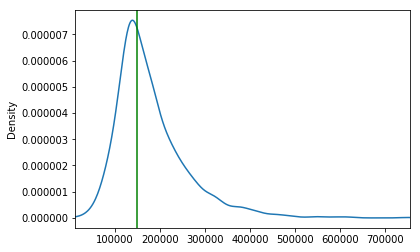

In [35]:
# mode in Green line
houses['SalePrice'].plot.kde(xlim = (houses['SalePrice'].min(),
                                  houses['SalePrice'].max()
                                 )
                         )

plt.axvline(150000, color = 'Green')

#### Rigt-skew distribution
In a right-skewed distribution, the mean will usually be to the right of the median, and the median will be to the right of the mode.

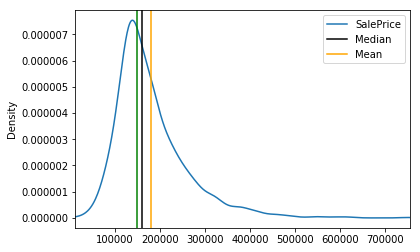

In [34]:
houses['SalePrice'].plot.kde(xlim = (houses['SalePrice'].min(),houses['SalePrice'].max()))
plt.axvline(150000, color = 'Green')
plt.axvline(houses['SalePrice'].median(), color = 'Black', label = 'Median')
plt.axvline(houses['SalePrice'].mean(), color = 'Orange', label = 'Mean')
plt.legend()

#### Left-skew distribution
For a left-skewed distribution, the mean is positioned to the left of the median, and the median to the left of the mode.

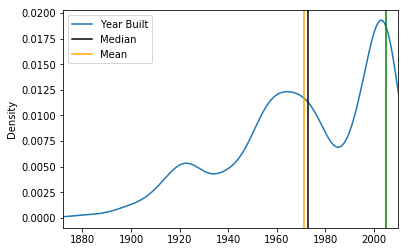

In [36]:
houses['Year Built'].plot.kde(xlim = (houses['Year Built'].min(),houses['Year Built'].max()))
plt.axvline(2005, color = 'Green')
plt.axvline(houses['Year Built'].median(), color = 'Black', label = 'Median')
plt.axvline(houses['Year Built'].mean(), color = 'Orange', label = 'Mean')
plt.legend()
plt.show()

### 7. Symmetrical Distributions
The location of the mean, median, and mode are also predictable for symmetrical distributions.

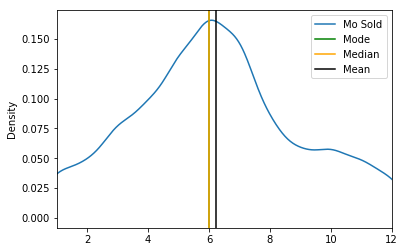

In [37]:
houses['Mo Sold'].plot.kde(xlim=(1,12))
plt.axvline(houses['Mo Sold'].mode()[0], color='Green', label='Mode')
plt.axvline(houses['Mo Sold'].median(), color='Orange', label='Median')
plt.axvline(houses['Mo Sold'].mean(), color='Black', label='Mean')
plt.legend()
plt.show()
